In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pickle

In [9]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.1 MB 5.2 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 3.2 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.1 MB 3.9 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/11.1 MB 3.5 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 3.7 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 3.9 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.1 MB 3.7 MB/s eta 0:00:02
   ------------------------- -------------- 7.1/11.1 MB 3.6 MB/s eta 0:00:02
   ---------------------------- ----------- 7.9/11.1 MB 3.4 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.5 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.1 MB 1.2 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/8.1 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.2 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.5 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.1 MB 1.5 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/8.1 MB 1.5 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.1 MB 1.5 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.5 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.1 MB 1.5 MB/s eta 0:00:04
   ------------------ ----------------


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install pandas

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 2.4 MB/s eta 0:00:06
   --- ------------------------------------ 1.0/12.6 MB 2.3 MB/s eta 0:00:06
   ---- ----------------------------------- 1.6/12.6 MB 2.5 MB/s eta 0:00:05
   ------- -------------------------------- 2.4/12.6 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.9/12.6 MB 2.6 MB/s eta 0:00:04
   ---------- ----------------------------- 3.4/12.6 MB 2.7 MB/s eta 0:00:04
   ------------ --------------------------- 3.9/12.6 MB 2.6 MB/s eta 0:00:04
   ------------- -------------------------- 4.2/12.6 MB 2.5 MB/s eta 0:00:04
   --------------- ------------------------ 5.0/12.6 MB 2.6 MB/s eta 0:00:03
   ----------------- -------------


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
df = pd.read_csv('Dataset_14-day_AA_depression_symptoms_mood_and_PHQ-9.csv')


In [13]:
print(df.head())

   Unnamed: 0  user_id  phq1  phq2  phq3  phq4  phq5  phq6  phq7  phq8  ...  \
0           1        1   3.0   3.0   3.0   3.0   2.0   3.0   1.0   2.0  ...   
1           2        1   3.0   3.0   3.0   3.0   2.0   3.0   1.0   2.0  ...   
2           3        1   3.0   3.0   3.0   3.0   2.0   3.0   1.0   2.0  ...   
3           4        1   3.0   3.0   3.0   3.0   2.0   3.0   1.0   2.0  ...   
4           5        1   3.0   3.0   3.0   3.0   2.0   3.0   1.0   2.0  ...   

   q14  q16  q46  q47  happiness.score                 time  period.name  \
0  0.0  NaN  NaN  NaN                2  2017-01-22 20:11:59      evening   
1  NaN  NaN  1.0  NaN                3  2017-02-08 22:53:06      evening   
2  NaN  NaN  NaN  NaN                3  2017-02-08 08:00:46      morning   
3  NaN  1.0  NaN  NaN                2  2017-01-22 14:01:25       midday   
4  1.0  NaN  1.0  NaN                2  2017-01-21 15:37:24       midday   

            start.time    phq.day  id  
0  2017-01-09 07:22:37  -0.9

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16150 entries, 0 to 16149
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16150 non-null  int64  
 1   user_id          16150 non-null  int64  
 2   phq1             15864 non-null  float64
 3   phq2             15613 non-null  float64
 4   phq3             15613 non-null  float64
 5   phq4             15613 non-null  float64
 6   phq5             15613 non-null  float64
 7   phq6             15613 non-null  float64
 8   phq7             15613 non-null  float64
 9   phq8             15613 non-null  float64
 10  phq9             15613 non-null  float64
 11  age              9694 non-null   float64
 12  sex              14840 non-null  object 
 13  q1               1973 non-null   float64
 14  q2               1763 non-null   float64
 15  q3               1924 non-null   float64
 16  q4               1713 non-null   float64
 17  q5          

In [15]:
print(df.isnull().sum())

Unnamed: 0             0
user_id                0
phq1                 286
phq2                 537
phq3                 537
phq4                 537
phq5                 537
phq6                 537
phq7                 537
phq8                 537
phq9                 537
age                 6456
sex                 1310
q1                 14177
q2                 14387
q3                 14226
q4                 14437
q5                 14159
q6                 14331
q7                 14414
q8                 14260
q9                 14258
q10                14307
q11                14348
q12                14374
q13                12959
q14                12309
q16                14226
q46                14343
q47                14143
happiness.score        0
time                   0
period.name            0
start.time             0
phq.day                0
id                     0
dtype: int64


In [16]:
if 'id' in df.columns:
    df = df.drop('id', axis=1)
if 'timestamp' in df.columns:
    df = df.drop('timestamp', axis=1)

In [17]:
# Loop through all columns
for column in df.columns:
    if df[column].dtype == 'object':  # If column is text (object type)
        df[column] = df[column].fillna(df[column].mode()[0])
    else:  # If column is numeric
        df[column] = df[column].fillna(df[column].median())


In [22]:
def phq9_to_level(score):
    if score <= 4:
        return 'Minimal'
    elif score <= 9:
        return 'Mild'
    elif score <= 14:
        return 'Moderate'
    elif score <= 19:
        return 'Moderately Severe'
    else:
        return 'Severe'


In [21]:
print(df.columns.tolist())

['Unnamed: 0', 'user_id', 'phq1', 'phq2', 'phq3', 'phq4', 'phq5', 'phq6', 'phq7', 'phq8', 'phq9', 'age', 'sex', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q16', 'q46', 'q47', 'happiness.score', 'time', 'period.name', 'start.time', 'phq.day']


In [24]:
# If these are the columns for each question
question_columns = [
    'q1', 'q2', 'q3', 'q4', 'q5',
    'q6', 'q7', 'q8', 'q9'
]

# Then create 'PHQ-9 Total Score'
df['PHQ-9 Total Score'] = df[question_columns].sum(axis=1)


In [26]:
# Example: Deriving Depression_Level based on PHQ-9 score
df['Depression_Level'] = df['PHQ-9 Total Score'].apply(lambda x: 'Severe' if x >= 20 else 'Moderate' if x >= 10 else 'Mild' if x >= 5 else 'None')


In [27]:
X = df[['PHQ-9 Total Score']]
y = df['Depression_Level']

In [28]:
# 8. Encode Categorical Features
# (only if you have non-numeric data)
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# 10. Standardize (optional but good practice)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# 11. Model Training (Logistic Regression)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

c:\xampp\htdocs\depanalysis\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

    Moderate       1.00      1.00      1.00       955
      Severe       1.00      1.00      1.00      2275

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230


Confusion Matrix:



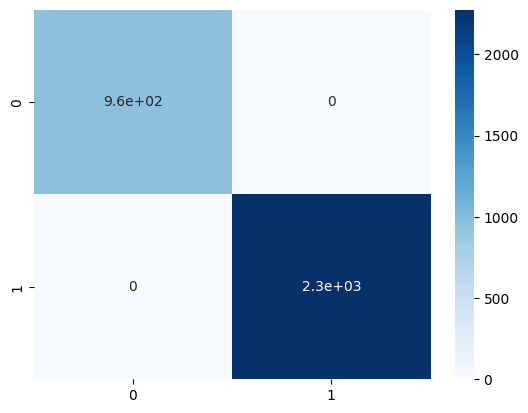

In [32]:
# 12. Model Evaluation
y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.show()

In [33]:
# 13. Save the Model
pickle.dump(model, open('depression_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print("Model and Scaler Saved Successfully!")

Model and Scaler Saved Successfully!
